In [129]:
import cv2
import sys
import matplotlib.pyplot as plt
import numpy as np

In [130]:
path = 'C:/Users/USER/Desktop/mask/' # 이미지 파일 경로
image_file = path+'h.jpg' 

In [131]:
cascade_file = 'C:/Users/USER/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml'
cascade_file2 = 'C:/Users/USER/anaconda3/Lib/site-packages/cv2/data/haarcascade_lefteye_2splits.xml'


In [132]:
image = cv2.imread(image_file)
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cascade = cv2.CascadeClassifier(cascade_file)
face_list = cascade.detectMultiScale(image_gs,scaleFactor = 1.1,
                                    minNeighbors=3, minSize=(70,70))
cascade2 = cv2.CascadeClassifier(cascade_file2)
eye_list = cascade2.detectMultiScale(image_gs,scaleFactor = 1.1,
                                    minNeighbors=1, minSize=(10,10))

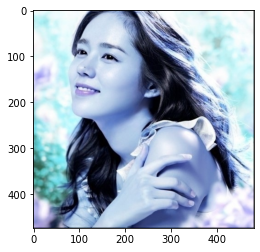

In [133]:
plt.imshow(image)

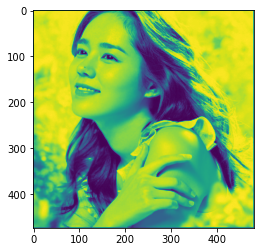

In [134]:
plt.imshow(image_gs)

[[ 35  21 195 195]]
[[ 92 132  66  66]
 [140  69  52  52]
 [ 87  65  42  42]]


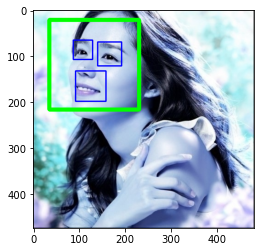

In [135]:
if len(face_list) > 0:
    print(face_list)
    color = [(0,0,255),(0,255,0)]
    # 얼굴영역
    for face in face_list:
        x,y,w,h = face
        cv2.rectangle(image,(x,y),(x+w,y+h),color[1],thickness=8)
    # 눈 영역
    if len(eye_list) > 0:
        print(eye_list)
        for eye in eye_list:
            x,y,w,h = eye
            cv2.rectangle(image,(x,y),(x+w,y+h),color[0],thickness=2)
    plt.imshow(image)        
    cv2.imwrite(path+'facedetect_output.png',image)
    
else:
    print('no_face_detection')

In [136]:
eye_list

array([[ 92, 132,  66,  66],
       [140,  69,  52,  52],
       [ 87,  65,  42,  42]], dtype=int32)

In [137]:
len(eye_list)

3

In [138]:
eye_list

array([[ 92, 132,  66,  66],
       [140,  69,  52,  52],
       [ 87,  65,  42,  42]], dtype=int32)

In [139]:
height = []
if len(eye_list) > 2:
    for eye in eye_list:
        for i in range(1,2):
            height.append(eye[i])
height

[132, 69, 65]

In [140]:
# 입 좌표 제거
new_eye_list = []
for eye in eye_list:
    if max(height) not in eye:
        new_eye_list.append(eye)

In [141]:
# 최종 눈 좌표
new_eye_list

[array([140,  69,  52,  52], dtype=int32),
 array([87, 65, 42, 42], dtype=int32)]